In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import zipfile

# Get Dataset

In [4]:
def unzip_file(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file = '/content/drive/MyDrive/SU/Dataset_Speech_Assignment.zip'
extract_to = 'Dataset'
unzip_file(zip_file, extract_to)

# Install Anaconda and setup env

In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
%env PYTHONPATH = # /env/python

env: PYTHONPATH=# /env/python


In [7]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
!chmod +x Miniconda3-py38_4.12.0-Linux-x86_64.sh
!./Miniconda3-py38_4.12.0-Linux-x86_64.sh -b -f -p /usr/local
!conda update conda

--2024-05-01 12:55:39--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76120962 (73M) [application/x-sh]
Saving to: ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’

Miniconda3-py38_4.1 100%[===================>]  72.59M  46.6MB/s    in 1.6s    

2024-05-01 12:55:41 (46.6 MB/s) - ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’ saved [76120962/76120962]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py38h06a4308_2
    - cffi==1.15.0=py38hd667e15_1
  

In [8]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [9]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [10]:
!conda create -n SSL_Spoofing python=3.7

Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/SSL_Spoofing

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    openssl-1.1.1w             |       h7f8727e_0         3.7 MB
    pip-22.3.1                 |   py37h06a4308_0         2.7 MB
    python-3.7.16              |       h7a1cb2a_0        44.8 MB
    setuptools-65.6.3          |   py37h06a4308_0         1.1 MB
    wheel-0.38.4               |   py37h06a4308_0          63 K

In [11]:
!source activate SSL_Spoofing

# Clone required repos and Install required packages

In [12]:
!git clone https://github.com/TakHemlata/SSL_Anti-spoofing.git

Cloning into 'SSL_Anti-spoofing'...
remote: Enumerating objects: 1579, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1579 (delta 52), reused 82 (delta 48), pack-reused 1489
Receiving objects: 100% (1579/1579), 30.57 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (293/293), done.
Updating files: 100% (1247/1247), done.


In [13]:
%%shell
eval "$(conda shell.bash hook)"
conda activate SSL_Spoofing
pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 413.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.1 MB/s eta 0:00:00


In [14]:
%cd /content/SSL_Anti-spoofing/fairseq-a54021305d6b3c4c5959ac9395135f63202db8f1

/content/SSL_Anti-spoofing/fairseq-a54021305d6b3c4c5959ac9395135f63202db8f1


In [15]:
%%shell
eval "$(conda shell.bash hook)"
conda activate SSL_Spoofing
pip install --editable ./

Obtaining file:///content/SSL_Anti-spoofing/fairseq-a54021305d6b3c4c5959ac9395135f63202db8f1
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 16.8 MB/s eta 0:00:00
  Using cached Cython-3.0.10-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.6/761.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.9/427.9 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 16.8

In [16]:
%%bash
source activate SSL_Spoofing
conda env list
python
import sys
print(sys.path)

# conda environments:
#
base                     /usr/local
SSL_Spoofing          *  /usr/local/envs/SSL_Spoofing

['', '/content/SSL_Anti-spoofing/fairseq-a54021305d6b3c4c5959ac9395135f63202db8f1/# /env/python', '/usr/local/envs/SSL_Spoofing/lib/python37.zip', '/usr/local/envs/SSL_Spoofing/lib/python3.7', '/usr/local/envs/SSL_Spoofing/lib/python3.7/lib-dynload', '/usr/local/envs/SSL_Spoofing/lib/python3.7/site-packages']


In [17]:
%%bash
source activate SSL_Spoofing
pip list

Package                Version         Editable project location
---------------------- --------------- ---------------------------------------------------------------------------
antlr4-python3-runtime 4.8
bitarray               2.9.2
certifi                2022.12.7
cffi                   1.15.1
colorama               0.4.6
Cython                 3.0.10
fairseq                1.0.0a0+4acaa61 /content/SSL_Anti-spoofing/fairseq-a54021305d6b3c4c5959ac9395135f63202db8f1
hydra-core             1.0.7
importlib-resources    5.12.0
lxml                   5.2.1
numpy                  1.21.6
omegaconf              2.0.6
Pillow                 9.5.0
pip                    22.3.1
portalocker            2.7.0
pycparser              2.21
PyYAML                 6.0.1
regex                  2024.4.16
sacrebleu              2.4.2
setuptools             65.6.3
tabulate               0.9.0
torch                  1.8.1+cu111
torchaudio             0.8.1
torchvision            0.9.1+cu111
tqdm           

In [25]:
%%bash
source activate SSL_Spoofing
pip install pandas
pip install -r requirements.txt
pip install tensorboard
pip install tqdm

  Using cached librosa-0.9.1-py3-none-any.whl (213 kB)
  Using cached tensorboardX-2.5-py2.py3-none-any.whl (125 kB)
  Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached pooch-1.8.1-py3-none-any.whl (62 kB)
  Using cached numba-0.56.4-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
  Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl (1.2 MB)
  Using cached llvmlite-0.39.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Using cached platformdirs-4.0.0-py3-none-any.whl (17 kB)


In [19]:
%cd /content/SSL_Anti-spoofing/

/content/SSL_Anti-spoofing


In [20]:
!wget https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt

--2024-05-01 13:00:43--  https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.51, 3.162.163.11, 3.162.163.34, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808868242 (3.5G) [binary/octet-stream]
Saving to: ‘xlsr2_300m.pt’

xlsr2_300m.pt       100%[===================>]   3.55G  38.9MB/s    in 1m 46s  

2024-05-01 13:02:29 (34.3 MB/s) - ‘xlsr2_300m.pt’ saved [3808868242/3808868242]



# Task 1

In [35]:
%%bash
source activate SSL_Spoofing

python
import os
import json
import librosa
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from model import Model

# print(device)

def load_model(model_path, device):
  model = Model(args=None, device=device)
  map_location=torch.device(device)
  stateDic = torch.load(model_path, map_location=map_location)
  model.load_state_dict(stateDic)
  model = model.to(device)
  return model

def read_data(path):
  file_names = []
  file_paths = []
  labels = []

  def collect_file_info(directory, label):
      for root, dirs, files in os.walk(directory):
          for file in files:
              if file.endswith('.wav') or file.endswith('.mp3'):
                  file_names.append(file)
                  file_paths.append(os.path.join(root, file))
                  labels.append(label)

  fake_dir = os.path.join(path, 'Fake')
  real_dir = os.path.join(path, 'Real')

  collect_file_info(fake_dir, 'Fake')
  collect_file_info(real_dir, 'Real')

  data = {
      'filename': file_names,
      'path': file_paths,
      'fake/real': labels
  }
  df = pd.DataFrame(data)

  return df


class SoundDataset(Dataset):
    def __init__(self, dataframe, dur=6, sample_rate=16000):
        self.dataframe = dataframe
        self.sample_rate = sample_rate
        self.dur = dur
        self.max_len = dur * sample_rate

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        # print(row)
        audio_path = row["path"]
        label_text = row["fake/real"]
        X, fs = librosa.load(audio_path, sr=self.sample_rate)
        x_input = self.pad_audio(X)

        if label_text == "Real":
          label = 1
        else:
          label = 0

        return x_input, label

    def __len__(self):
        return len(self.dataframe)

    def pad_audio(self, audio_data):
        audio_length = audio_data.shape[0]
        if audio_length >= self.max_len:
            return torch.Tensor(audio_data[: self.max_len])
        repetitions = int(self.max_len / audio_length) + 1
        padded_audio = np.tile(audio_data, (1, repetitions))[:, : self.max_len][0]
        return torch.Tensor(padded_audio)

data_dir = '/content/Dataset/Dataset_Speech_Assignment/'
la_model_path = '/content/drive/MyDrive/SU/Pre_trained_SSL_anti-spoofing_models/LA_model.pth'


data_df = read_data(data_dir)
print(data_df.shape)
dataset = SoundDataset(data_df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model(la_model_path, device)
model.eval()

true = []
pred = []
with torch.no_grad():
  for data, labels in tqdm(data_loader):
    data, labels = data.to(device), labels.to(device)
    outputs = model(data)
    # print(outputs)
    probabilities = F.softmax(outputs, dim=1)
    # print(probabilities)
    # print('***')
    pred.extend(probabilities[:, 1].cpu().numpy())
    true.extend(labels.cpu().numpy())

out_df = pd.DataFrame({'true_labels': true, 'predictions': pred})
out_df.to_csv('/content/labels_and_predictions_LA.csv', index=False)

(300, 3)


 13%|█▎        | 10/75 [00:09<00:50,  1.28it/s]/usr/local/envs/SSL_Spoofing/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 32%|███▏      | 24/75 [00:22<00:42,  1.21it/s]/usr/local/envs/SSL_Spoofing/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 48%|████▊     | 36/75 [00:37<00:36,  1.07it/s]/usr/local/envs/SSL_Spoofing/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 57%|█████▋    | 43/75 [00:50<00:47,  1.50s/it]/usr/local/envs/SSL_Spoofing/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 63%|██████▎   | 47/75 [00:53<00:24,  1.13it/s]/usr/local/envs/SSL_Spoofing/lib/python3.7/site-packages/librosa/

# Task 1&2 - Metrics and analysis


In [65]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

metric_df = pd.read_csv('/content/labels_and_predictions_LA.csv')

In [39]:
true = metric_df['true_labels']
pred = metric_df['predictions']

In [69]:
def compute_eer_auc(label, pred):
    fpr, tpr, threshold = sklearn.metrics.roc_curve(label, pred)
    auc = roc_auc_score(label, pred)
    fnr = 1 - tpr

    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    eer = (eer_1 + eer_2) / 2

    return eer, auc


def plot_roc_curve(true_labels, predicted_probabilities):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig('/content/custom_data_roc_curve.png')
    plt.show()

    return roc_auc

In [64]:
eer, auc_score = compute_eer_auc(true, pred)
print('EER: ', eer)
print('AUC: ', auc_score)

EER:  0.4458333333333333
AUC:  0.594212962962963


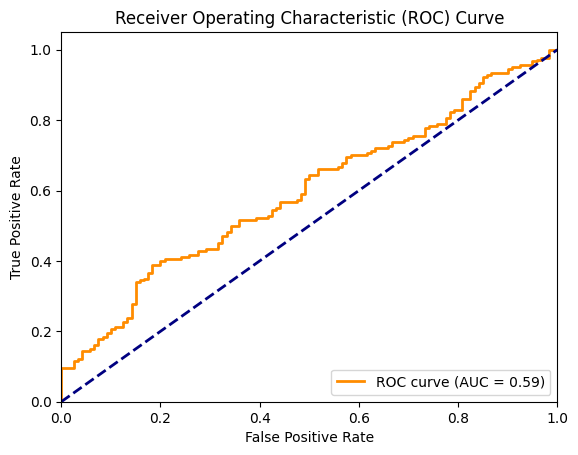

0.594212962962963

In [70]:
plot_roc_curve(true, pred)

In [54]:
print(eer, auc)

0.4458333333333333 0.594212962962963
